In [40]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

from bayesian_analysis import FitConfig
from cr_knee_fit import experiments
from cr_knee_fit.elements import Element
from cr_knee_fit.experiments import Experiment
from cr_knee_fit.fit_data import CRSpectrumData, GenericExperimentData
from cr_knee_fit.model_ import Model
import corner

In [41]:
FIT_DIR = Path("out/vanilla+lhaaso-v2")
fc = FitConfig.model_validate_json((FIT_DIR / "config-dump.json").read_text())
theta_sample = np.loadtxt(FIT_DIR / "theta.txt")
median_model = Model.unpack(np.median(theta_sample, axis=0), layout_info=fc.model)

In [42]:
labels = np.array(median_model.labels(latex=False))

for i, lbl in enumerate(labels):
    print(f"{i: >2}. {lbl}")

 0. lgI_{H}
 1. alpha_{H}
 2. lgI_{He}
 3. alpha_{He}
 4. lgI_{C}
 5. lgI_{O}
 6. lgI_{Mg}
 7. lgI_{Si}
 8. lgI_{Fe}
 9. alpha_{C, O, Mg, Si, Fe}
10. lg(R^b)_1
11. d_alpha_1
12. lg(R^b)_2
13. d_alpha_2
14. lg(R^b)_3
15. d_alpha_3
16. lgK
17. lg(f_AMS-02)
18. lg(f_CALET)
19. lg(f_CREAM)
20. lg(f_DAMPE)
21. lg(f_GRAPES-3)
22. lg(f_ISS-CREAM)
23. lg(f_LHAASO (Sibyll 2.3))


In [47]:
from matplotlib.figure import Figure


def plot_corner(mask_or_indices: np.ndarray, zoom_marginal_eti_cl: float | None =None) -> Figure:
    sample_to_plot = theta_sample[:, mask_or_indices]
    sample_labels = [
        "$" + label + "$" for label in np.array(median_model.labels(latex=True))[mask_or_indices]
    ]

    if zoom_marginal_eti_cl is not None:
        zoom_mask = np.ones(shape=sample_to_plot.shape[0], dtype=bool)
        for i_dim in range(sample_to_plot.shape[1]):
            marginal = sample_to_plot[:, i_dim]
            q_lower = (1 - zoom_marginal_eti_cl) / 2
            lower = np.quantile(marginal, q=q_lower)
            upper = np.quantile(marginal, q=1 - q_lower)
            zoom_mask &= (marginal > lower) & (marginal < upper)
        sample_to_plot = sample_to_plot[zoom_mask, :]

    return corner.corner(
        sample_to_plot,
        labels=sample_labels,
        show_titles=True,
        quantiles=[0.05, 0.5, 0.95],
    )

Text(0.5, 0.98, 'CR Model parameters')

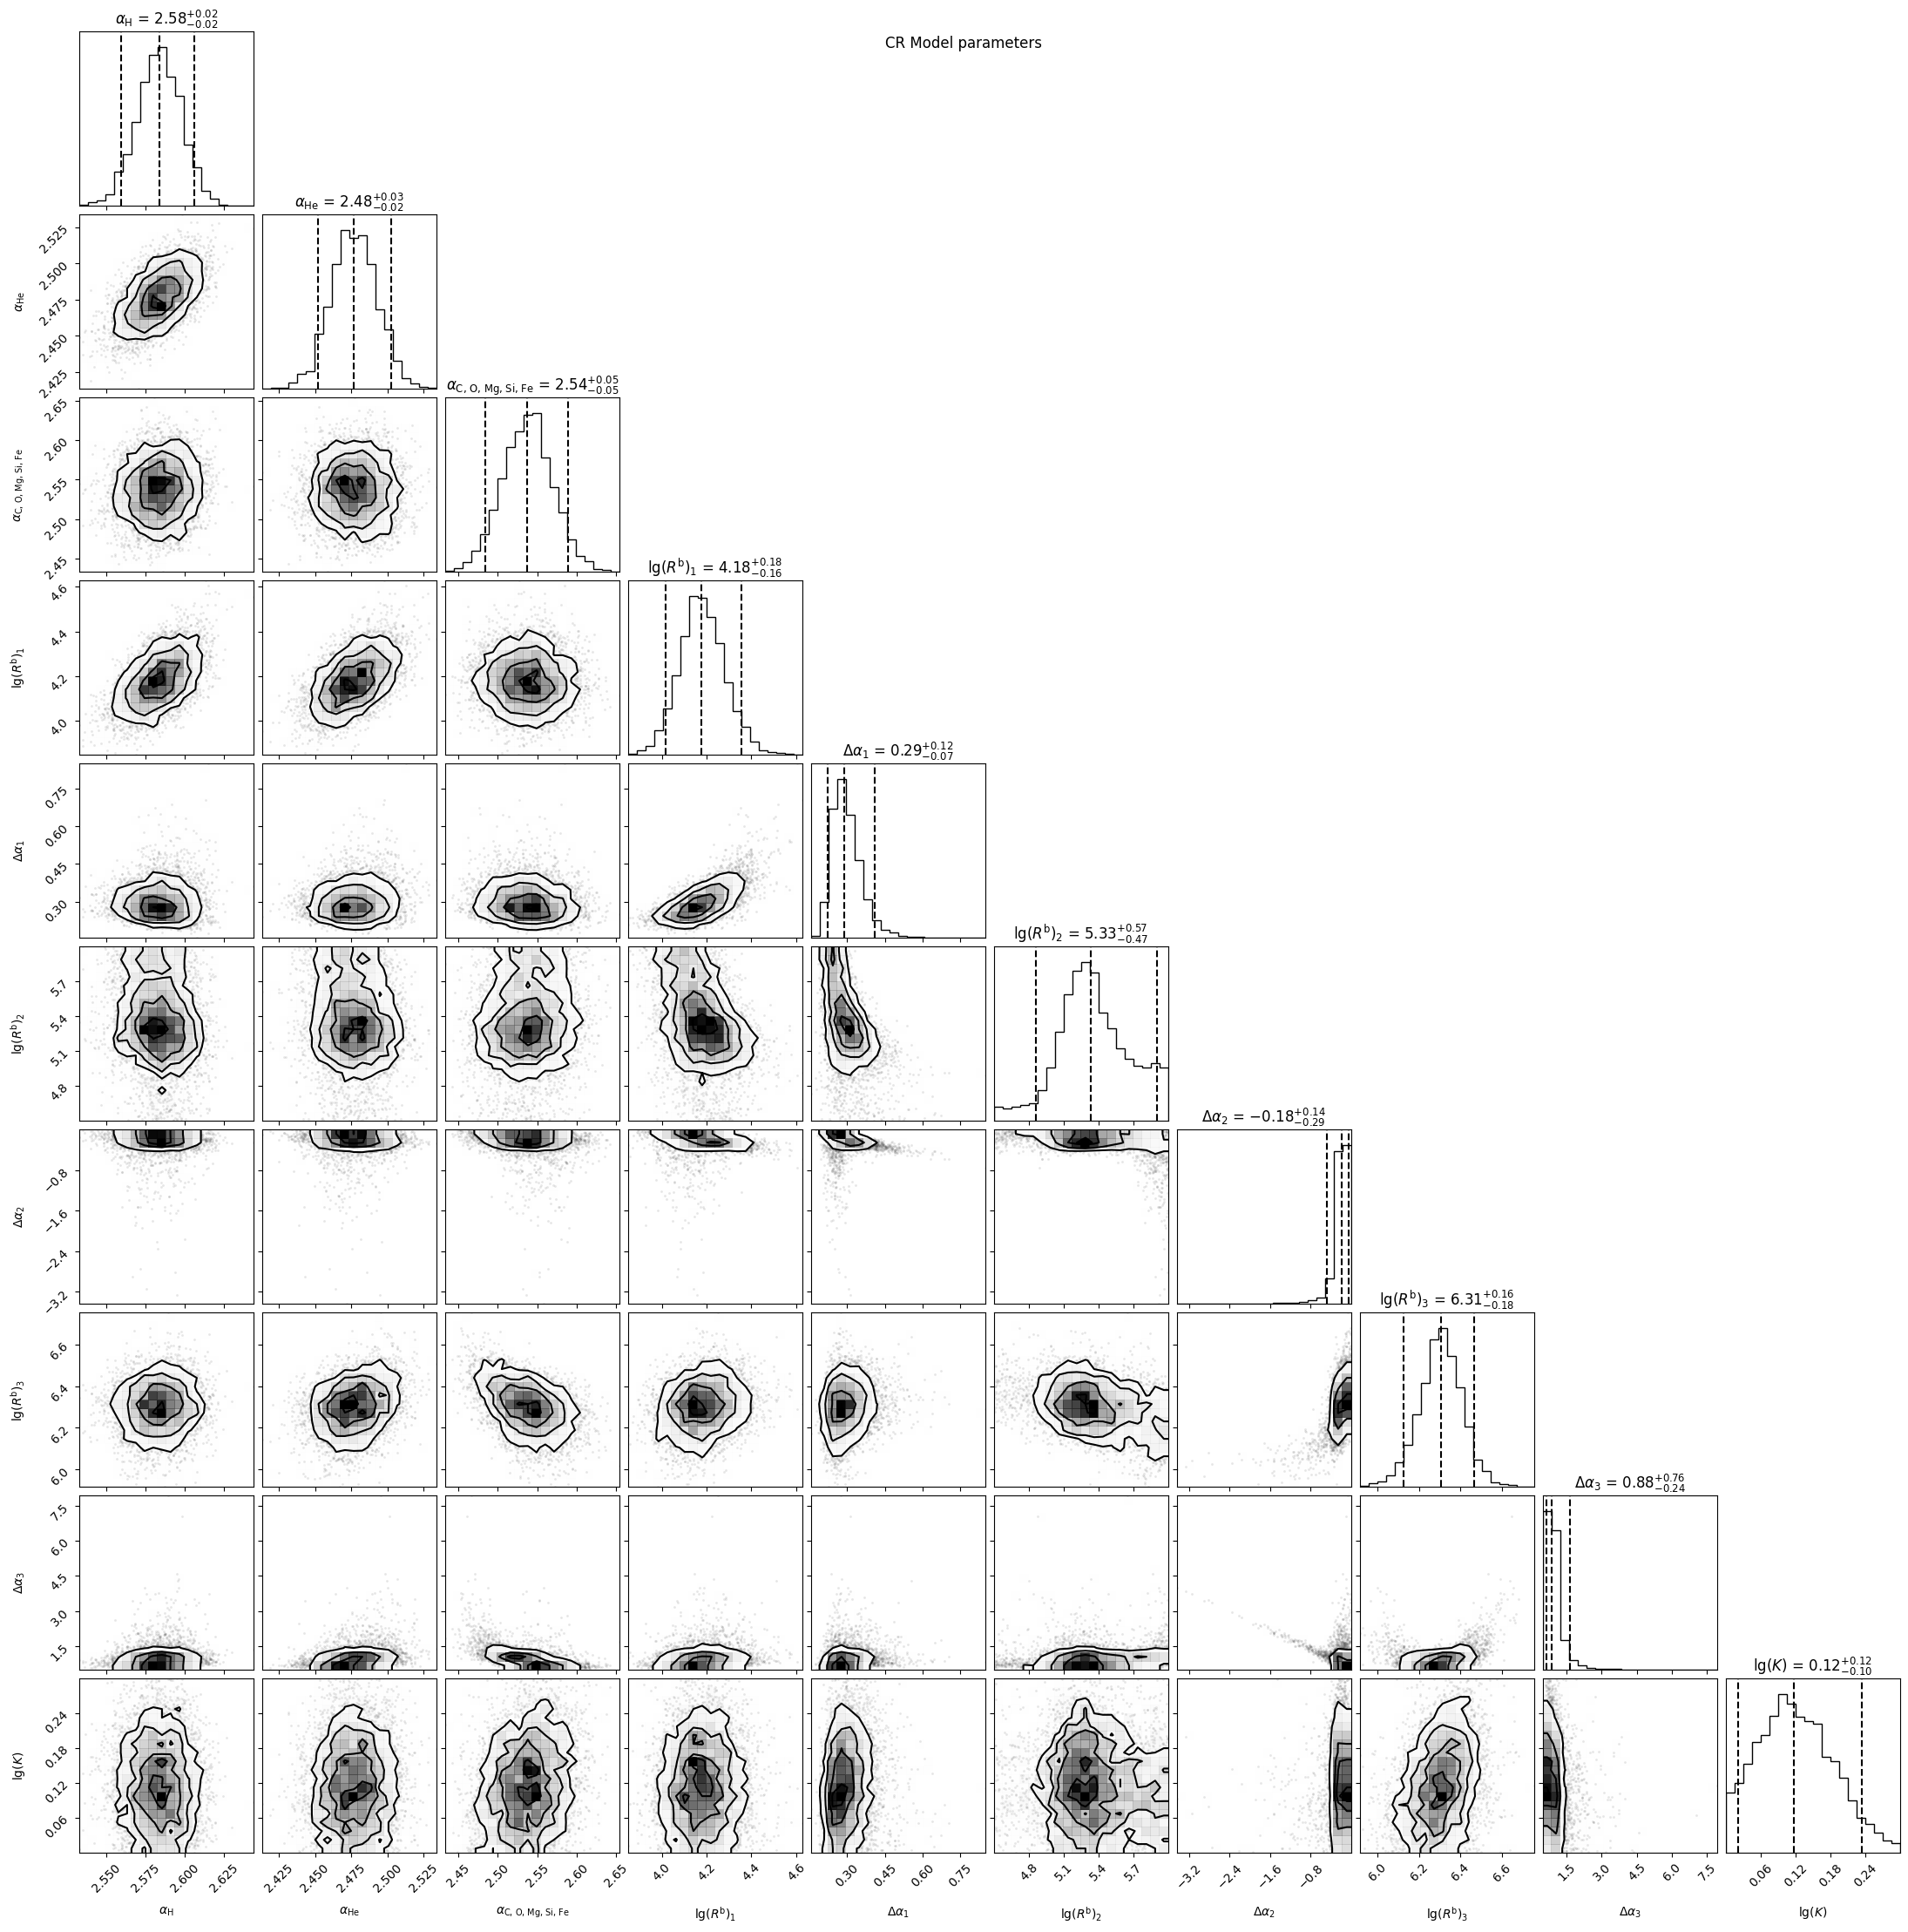

In [48]:
fig = plot_corner(
    mask_or_indices=~np.strings.startswith(labels, "lg(f_") & ~np.strings.startswith(labels, "lgI_")
)
fig.suptitle("CR Model parameters")

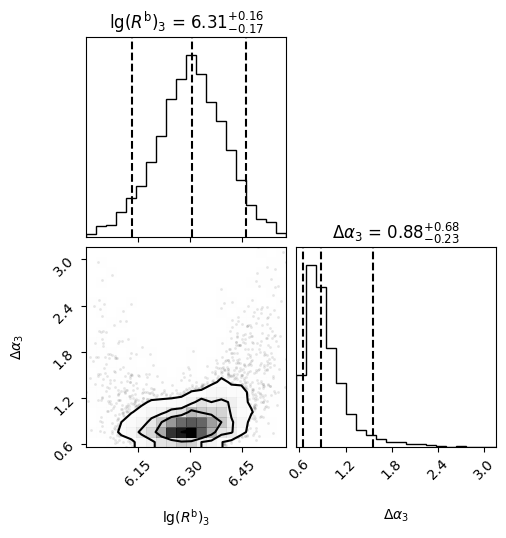

In [49]:
plot_corner(np.array([14, 15]), zoom_marginal_eti_cl=0.99);

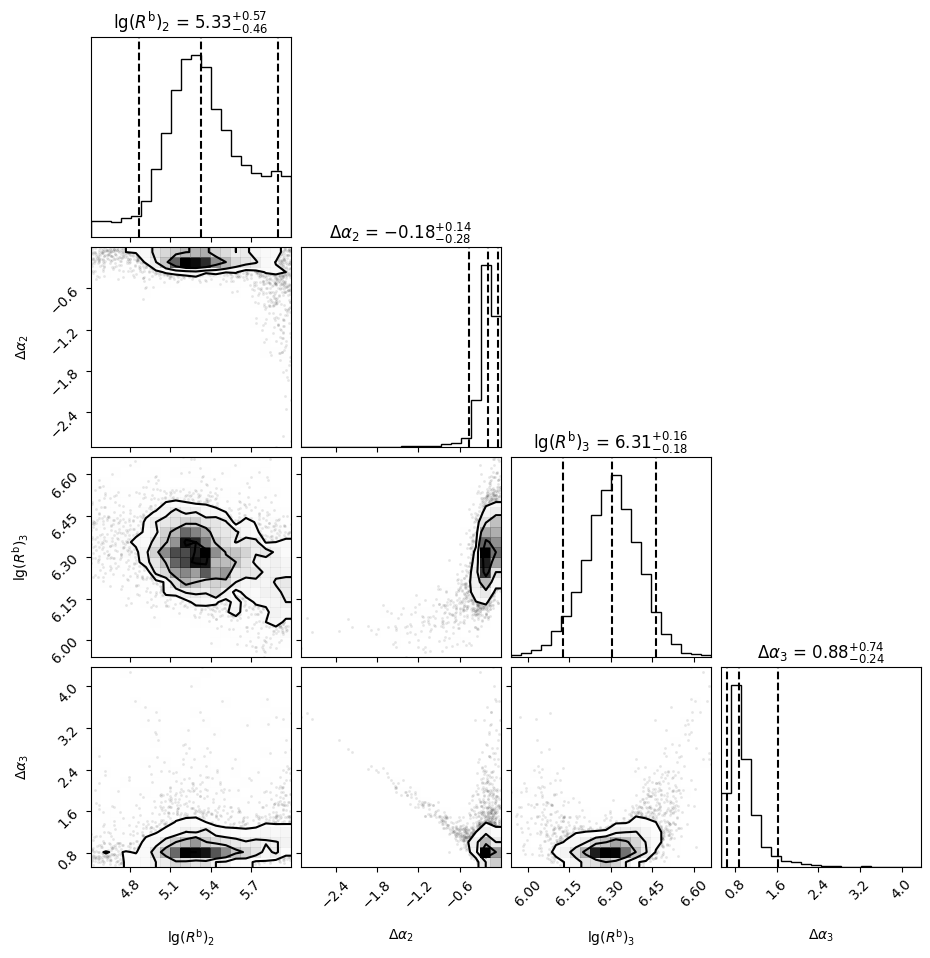

In [51]:
plot_corner(np.array([12, 13, 14, 15]), zoom_marginal_eti_cl=0.999);

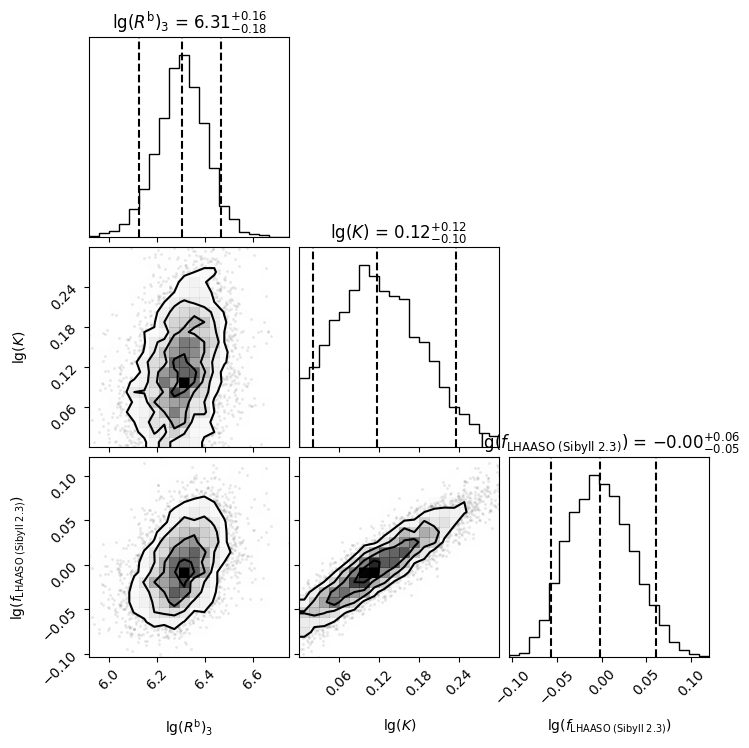

In [57]:

fig = plot_corner(np.array([14, 16, 23]), zoom_marginal_eti_cl=None)
# fig.tight_layout()